In [47]:
import sys
import math
import os
import itertools
from pywnxml.WNQuery import WNQuery
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter, attrgetter

In [57]:

# def line_prepender(filename, line):
#     with open(filename, 'r+') as f:
#         content = f.read()
#         f.seek(0, 0)
#     print(content[:39])
#     with open("tmp.xml", "w") as f:
#         f.write(content[:39]+"<WNXML>"+  content[39:] + "</WNXML>")
# line_prepender("plwordnet-3.2-visdisc.xml", "<WNXML>")
wordnet = WNQuery("tmp.xml", log=open(os.devnull, "w"))
wordnet.writeStats(sys.stdout)

PoS		#synsets	#word senses	#words
Nouns		132398		176779		134778
Verbs		27693		38564		19595
Adjectives	11256		14035		8006
Adverbs		0		0		0


In [41]:
for meaning in wordnet.lookUpLiteral('szkoda', 'n'):
    id = meaning.wnid
    print(meaning.toString())
#     print(list(map(str,meaning.synonyms)))
#     print(mwordnet.lookUpSense())
#     print("synonimy:")
#     for synonim in wordnet.lookUpRelation(id, 'n', 'bliskoznaczność'):
#         print(wordnet.lookUpID(synonim, 'n').toString())
    print("---------")

PLWN-00003675-n  {strata:1, utrata:1, szkoda:2, uszczerbek:1}  ()
---------
PLWN-00006533-n  {szkoda:1}  (brak danych)
---------


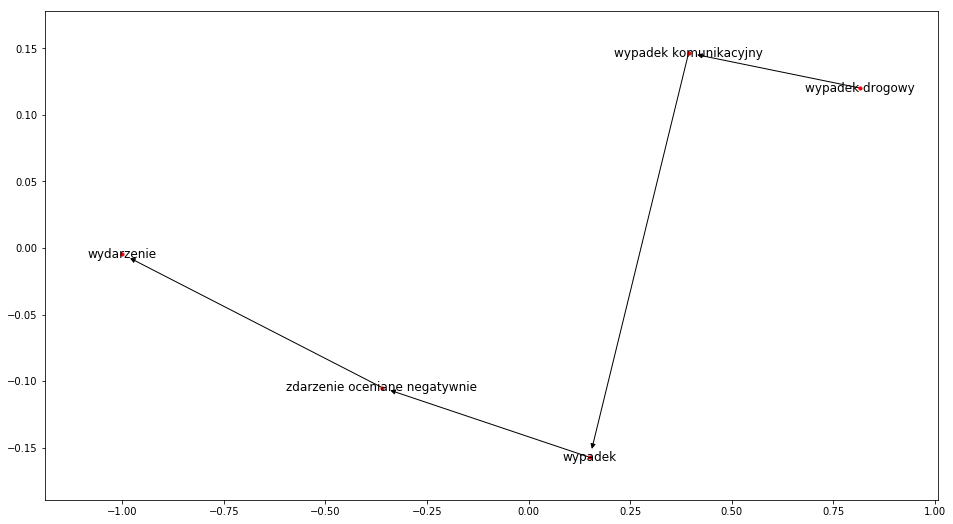

In [62]:
# wypadek = wordnet.lookUpLiteral('wypadek drogowy', 'n')
# print(wypadek[0])
# .synonyms[0].literal
hypernym_ids = wordnet.traceRelationD(wordnet.lookUpLiteral('wypadek drogowy', 'n')[0].wnid, 'n', 'hypernym')
nodes = map(lambda h: wordnet.lookUpID(h[0], 'n').synonyms[0].literal, hypernym_ids)
# node_list = list(nodes)
# print(node_list)

G = nx.DiGraph()
G.add_path(nodes)
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 9))

nx.draw_networkx_nodes(G, pos, node_size = 10)
nx.draw_networkx_edges(G, pos, arrows=True, width=1)
nx.draw_networkx_labels(G, pos)
plt.show()

In [81]:
accident = wordnet.lookUpSense("wypadek", 1, "n")
for r in wordnet.lookUpRelation(accident.wnid, accident.pos, "hiponimia"):
    print(wordnet.lookUpID(r, accident.pos).toString())

PLWN-00006486-n  {kolizja:2}  ()
PLWN-00034689-n  {tąpnięcie:1}  ()
PLWN-00034688-n  {zawał:2}  ()
PLWN-00001284-n  {zderzenie:2, kraksa:1}  ()
PLWN-00258639-n  {wykolejenie:2}  ()
PLWN-00389170-n  {zakrztuszenie:1, zachłyśnięcie:1, aspiracja:3}  ()
PLWN-00410901-n  {wypadek komunikacyjny:1}  ()
PLWN-00411618-n  {katastrofa budowlana:1}  ()
PLWN-00436137-n  {wypadek jądrowy:1}  ()
PLWN-00016131-n  {karambol:1}  ()
PLWN-00241026-n  {kapotaż:1}  ()


In [82]:
for fst in wordnet.lookUpRelation(accident.wnid, accident.pos, "hiponimia"):
    for sec in wordnet.lookUpRelation(fst, accident.pos, "hiponimia"):
        print(wordnet.lookUpID(sec, accident.pos).toString())


PLWN-00441365-n  {kolizja drogowa:1}  ()
PLWN-00037295-n  {obwał:1}  ()
PLWN-00235346-n  {czołówka:9, zderzenie czołowe:1}  ()
PLWN-00471555-n  {stłuczka:1}  ()
PLWN-00410902-n  {wypadek drogowy:1}  ()


In [24]:
word_set1 = [('szkoda', 2), ('strata', 1), ('uszczerbek', 1),
             ('szkoda majątkowa', 1), ('uszczerbek na zdrowiu', 1),
             ('krzywda', 1), ('niesprawiedliwość', 1), ('nieszczęście', 2)]
word_set2 = [('wypadek', 1), ('wypadek komunikacyjny', 1), ('kolizja', 2),
             ('zderzenie', 2), ('kolizja drogowa', 1), ('bezkolizyjny', 1),
             ('katastrofa budowlana', 1), ('wypadek drogowy', 1)]

def is_syn(first, second):
    if first and second:
        return first.wnid == second.wnid
    else:
        return None 

# print(wordnet.lookUpLiteral('dobry', 'j'))
# print(wordnet.dat("j"))
def get_sys(G, word_set):
    for fsr, sec in itertools.product(word_set, repeat=2):
        if fsr == sec:
            continue
        one = wordnet.lookUpSense(fsr[0], fsr[1], 'n')
        two = wordnet.lookUpSense(sec[0], sec[1], 'n')
#         if not one:
#             one = wordnet.lookUpSense(fsr[0], fsr[1], 'a')
#         if not two:
#             two = wordnet.lookUpSense(sec[0], sec[1], 'a')
#         if not one:
#             one = wordnet.lookUpSense(fsr[0], fsr[1], 'v')
#         if not two:
#             two = wordnet.lookUpSense(sec[0], sec[1], 'v')
#         if not one:
#             one = wordnet.lookUpSense(fsr[0], fsr[1], 'b')
#         if not two:
#             two = wordnet.lookUpSense(sec[0], sec[1], 'b')
        if one and two:
            if is_syn(one, two):
                G.add_edge(fsr[0], sec[0], rel="synonym")
                continue
            for ilr in  one.ilrs:
                if ilr[0] == two.wnid:
                    G.add_edge(fsr[0], sec[0], rel=ilr[1])
                    break

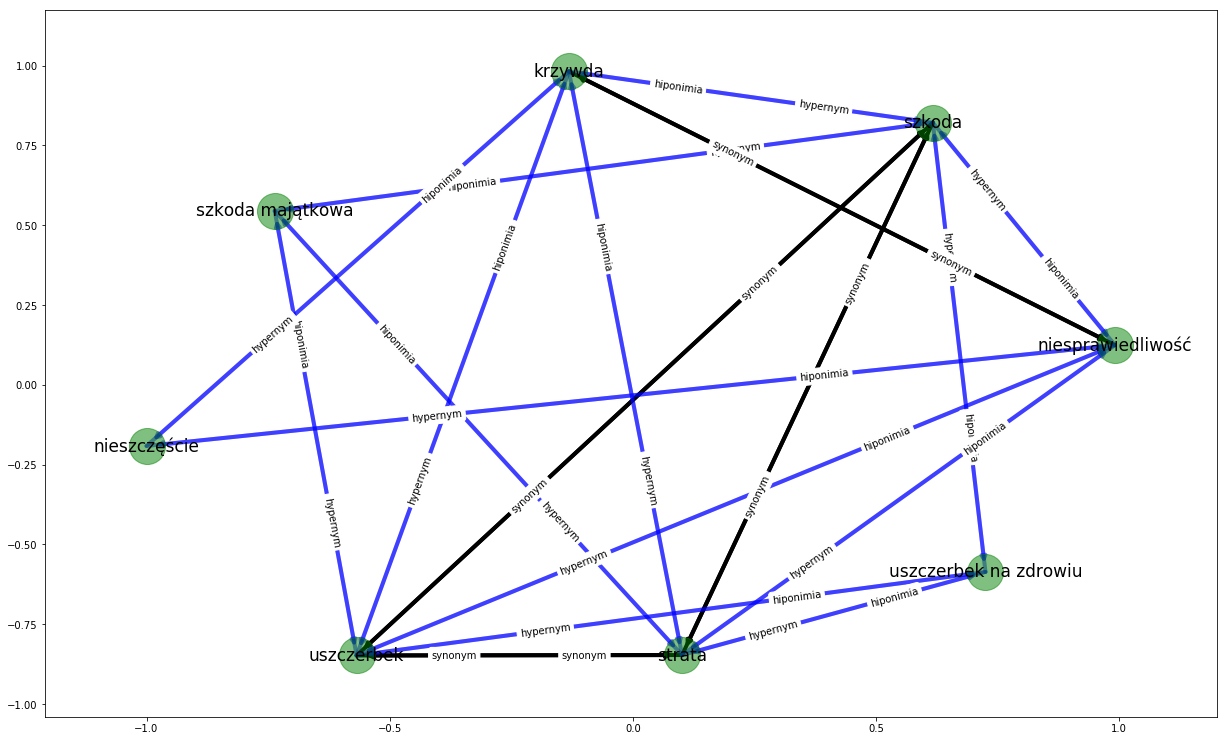

In [25]:
G = nx.DiGraph()
get_sys(G,word_set1)
            
plt.figure(figsize=(21, 13))


edge_labels = nx.get_edge_attributes(G ,'rel')



s=[(u,v) for (u,v,d) in G.edges(data=True) if d['rel'] =="synonym"]
hip=[(u,v) for (u,v,d) in G.edges(data=True) if d['rel'] !="synonym"]


pos=nx.spring_layout(G, k=8) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=1300, node_color="g",alpha=0.5)

# edges
nx.draw_networkx_edges(G,pos,edgelist=s,width=4,style='dashed')
nx.draw_networkx_edges(G,pos,edgelist=hip,width=4,alpha=0.5,edge_color='b')


# labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3)
nx.draw_networkx_labels(G,pos,font_size=17,font_family='sans-serif')
plt.show()

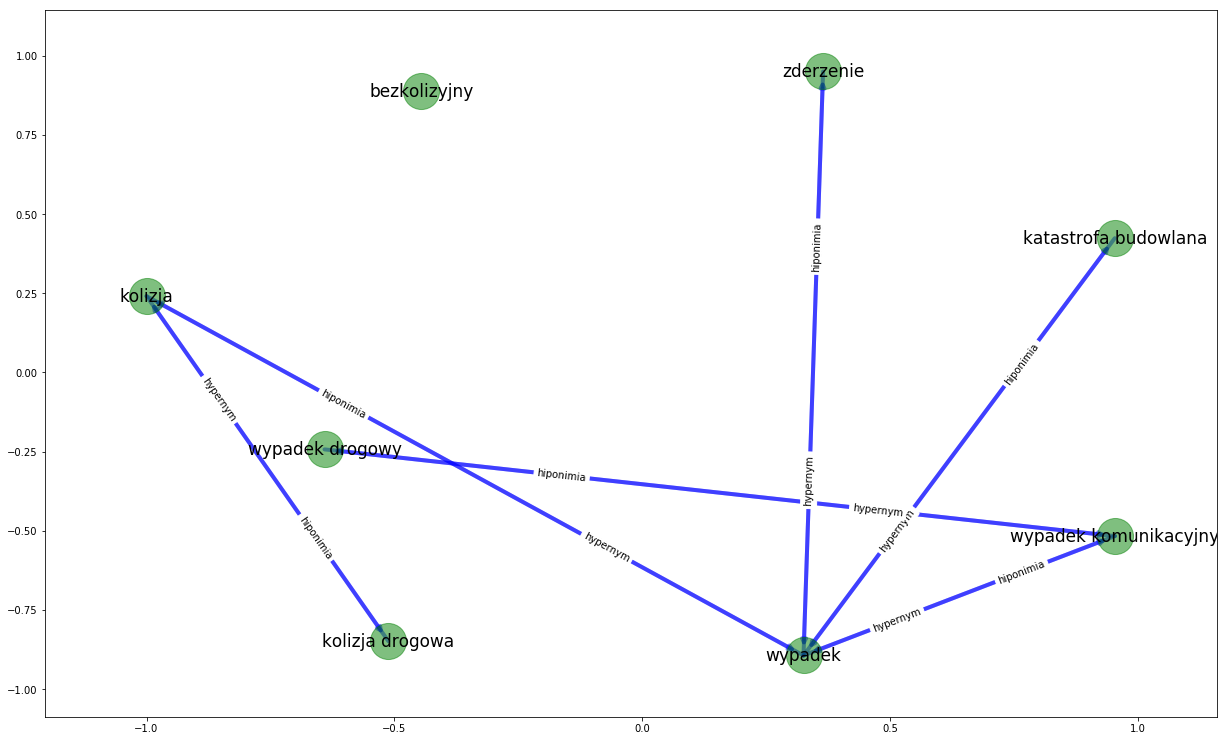

In [197]:
G = nx.DiGraph()
G.add_nodes_from(map(itemgetter(0), word_set2))
get_sys(G,word_set2)
            
plt.figure(figsize=(21, 13))


edge_labels = nx.get_edge_attributes(G ,'rel')



s=[(u,v) for (u,v,d) in G.edges(data=True) if d['rel'] =="synonym"]
hip=[(u,v) for (u,v,d) in G.edges(data=True) if d['rel'] !="synonym"]


pos=nx.spring_layout(G, k=8) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=1300, node_color="g",alpha=0.5)

# edges
nx.draw_networkx_edges(G,pos,edgelist=s,width=4,style='dashed')
nx.draw_networkx_edges(G,pos,edgelist=hip,width=4,alpha=0.5,edge_color='b')


# labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3)
nx.draw_networkx_labels(G,pos,font_size=17,font_family='sans-serif')
plt.show()

In [29]:
with open("tmp.xml", 'r') as f:
    content = f.read()
print(content.find("bezkolizyjny"))
# content[47446333].replace("a") 
print(content[47446330:47446333] +"a"+ content[47446334:47446340])

47446358
OS>a</POS>


In [66]:
words = [
    (("szkoda",2),("wypadek", 1)),
    (("kolizja", 2), ("szkoda majątkowa", 1)),
    (("nieszczęście", 2), ("katastrofa budowlana", 1))]
# relations = set(map(itemgetter(1),itertools.chain.from_iterable(map(attrgetter("ilrs"), wordnet.dat("n").values()))))
relations = ["hiponimia", "hypernym"]
for fst, sec in words:
    one = wordnet.lookUpSense(fst[0], fst[1], "n").wnid
    two = wordnet.lookUpSense(sec[0], sec[1], "n").wnid
    for rel in relations:
        try:
            val = wordnet.simLeaCho(one, two, "n", rel, True)
        except RecursionError:
            continue
        if val != -1:
            print("Leacocka-Chodorowa: {0} <-> {1}, relation: {2}, value: {3}".format(fst[0], sec[0], rel, val))
    print("-"*90)

Leacocka-Chodorowa: szkoda <-> wypadek, relation: hiponimia, value: 0.9030899869919435
Leacocka-Chodorowa: szkoda <-> wypadek, relation: hypernym, value: 1.0
------------------------------------------------------------------------------------------
Leacocka-Chodorowa: kolizja <-> szkoda majątkowa, relation: hiponimia, value: 1.0
Leacocka-Chodorowa: kolizja <-> szkoda majątkowa, relation: hypernym, value: 0.8239087409443188
------------------------------------------------------------------------------------------
Leacocka-Chodorowa: nieszczęście <-> katastrofa budowlana, relation: hiponimia, value: 1.0
Leacocka-Chodorowa: nieszczęście <-> katastrofa budowlana, relation: hypernym, value: 0.6478174818886375
------------------------------------------------------------------------------------------
